# Regularized multinomial logit model (using the LASSO penalty) and preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

%matplotlib inline

In [2]:
df = pd.read_csv("mnist.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
X = df.drop(["label"], axis=1)
y = df["label"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=37000)

X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
26960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# using saga because lbfgs does not support L1 (lasso) penalty
# tolerance is higher to allow for faster convergence
# cv: folds, C: complexity
LR = LogisticRegressionCV(solver='saga', 
                        multi_class='multinomial', 
                        penalty='l1', 
                        cv=10,
                        tol=0.1, 
                        Cs=10)

LR.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='multinomial', n_jobs=None,
                     penalty='l1', random_state=None, refit=True, scoring=None,
                     solver='saga', tol=0.1, verbose=0)

In [8]:
# Training accuracy
LR.score(X_train, y_train)

0.9204

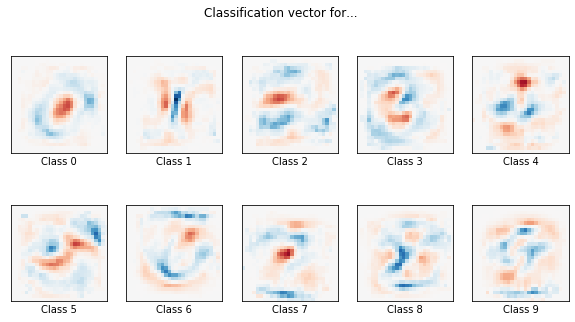

In [9]:
# copied from internet: 
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html

coef = LR.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

plt.show()

# Support vector machines

In [10]:
from sklearn.svm import SVC, NuSVC, LinearSVC

SVC = SVC(kernel="rbf",
          gamma="auto")

SVC.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
SVC.score(X_train, y_train)

0.978

In [12]:
NuSVC = NuSVC(kernel="rbf", 
              gamma="auto")

NuSVC.fit(X_train, y_train)

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

In [13]:
NuSVC.score(X_train, y_train)

0.8936

In [25]:
from sklearn.svm import SVC, NuSVC, LinearSVC

LinearSVC_model = LinearSVC(max_iter=10000, tol=0.1)

LinearSVC_model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.1,
          verbose=0)

In [27]:
LinearSVC_model.score(X_train, y_train)

0.9998

# Feed-forward neural networks

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20

y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train_cat,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test_cat))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 5000 samples, validate on 3700

In [39]:
model.evaluate(X_test, y_test_cat, verbose=0)

[0.4817559972152993, 0.9332702702702703]